# Bibliotecas

Primeiro, vamos importar as bibliotecas necessárias e renomeá-las para facilitar o uso em nosso código. A seguir, temos uma breve descrição de cada biblioteca:

- **NumPy** (renomeada como `np`): Biblioteca que fornece suporte para arrays multidimensionais e funções matemáticas eficientes para manipulação de grandes conjuntos de dados numéricos.
- **Matplotlib** (renomeada como `plt`): Biblioteca utilizada para a criação de gráficos e visualizações de dados. Ela oferece uma ampla gama de opções para gerar gráficos 2D, como linhas, barras, dispersões, histogramas, entre outros.
- **SciPy** (renomeada como curve_fit): Função da biblioteca SciPy usada para realizar ajustes de curvas aos dados experimentais, utilizando o método de mínimos quadrados não-lineares, permitindo modelar dados e encontrar os parâmetros ideais de uma função.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# [1]

## Euler (intermediária)

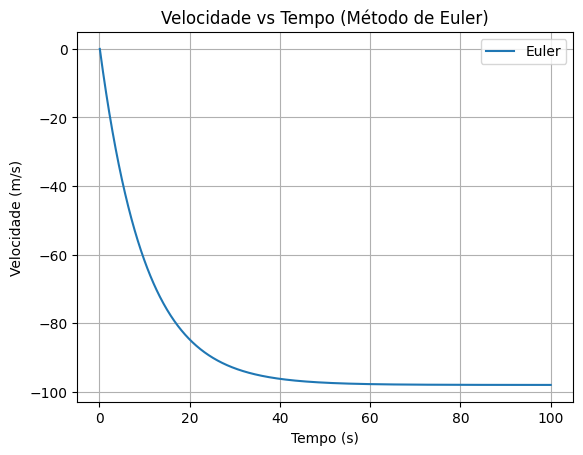

In [66]:
def euler(v0, tempo):
    """
    Simula a evolução da velocidade de um objeto sob ação de gravidade e força de arrasto linear,
    usando o método de Euler explícito.

    Parâmetros:
    - v0: Velocidade inicial (m/s).
    - tempo: Vetor de tempo (s).

    Retorna:
    - v_t: Lista com as velocidades calculadas em cada instante de tempo.
    """
    v_t = [v0]
    for i in range(1, len(tempo)):
        vi = v0 + (-9.8 - 0.1 * v0) * (tempo[i] - tempo[i - 1])
        v0 = vi
        v_t.append(vi)
    return v_t

# Condição inicial e definição do vetor de tempo
v0 = 0
tempo = np.linspace(0.1, 100, 1000)

# Chamada da função
v_t = euler(v0, tempo)

# Plotagem dos resultados
plt.plot(tempo, v_t, label='Euler')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade vs Tempo (Método de Euler)')
plt.legend()
plt.grid()
plt.show()

 ## Runge-Kutta de quarta ordem - RK4 (avançada)

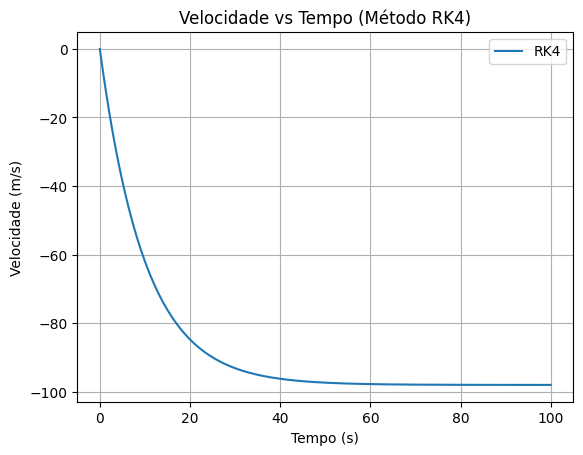

In [67]:
def rk4(v0, tempo):
    """
    Simula a evolução da velocidade de um objeto sob ação de gravidade e força de arrasto linear,
    utilizando o método de Runge-Kutta de quarta ordem (RK4).

    Parâmetros:
    - v0: Velocidade inicial (m/s).
    - tempo: Vetor de tempo (s).

    Retorna:
    - v_rk4: Lista com as velocidades calculadas em cada instante de tempo.
    """
    h = tempo[1] - tempo[0]  # Passo de tempo
    v_rk4 = [v0]  # Lista para armazenar os resultados

    def f(v):
        return -9.8 - 0.1 * v  # Equação diferencial

    for i in range(1, len(tempo)):
        k1 = f(v0)
        k2 = f(v0 + (h / 2) * k1)
        k3 = f(v0 + (h / 2) * k2)
        k4 = f(v0 + h * k3)
        v0 = v0 + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        v_rk4.append(v0)

    return v_rk4

# Condições iniciais e definição do vetor de tempo
v0 = 0
tempo = np.linspace(0, 100, 1000)

# Chamada da função
v_rk4 = rk4(v0, tempo)

# Plotagem dos resultados
plt.plot(tempo, v_rk4, label='RK4')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade vs Tempo (Método RK4)')
plt.legend()
plt.grid()
plt.show()

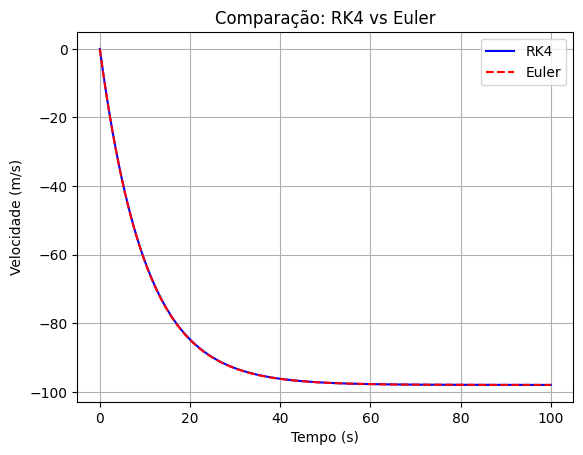

In [68]:
def comparar_metodos(tempo, v_rk4, v_euler):
    """
    Compara graficamente as soluções obtidas pelos métodos RK4 e Euler.

    Parâmetros:
    - tempo: Vetor de tempo (s).
    - v_rk4: Lista de velocidades calculadas pelo método RK4.
    - v_euler: Lista de velocidades calculadas pelo método de Euler.
    """
    plt.plot(tempo, v_rk4, label='RK4', color='b')
    plt.plot(tempo, v_euler, label='Euler', linestyle='--', color='r')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade (m/s)')
    plt.title('Comparação: RK4 vs Euler')
    plt.legend()
    plt.grid()

# Chamada da função de comparação
comparar_metodos(tempo, v_rk4, v_t)

# Exibição do gráfico
plt.show()

# [2]

## Oscilador harmônico

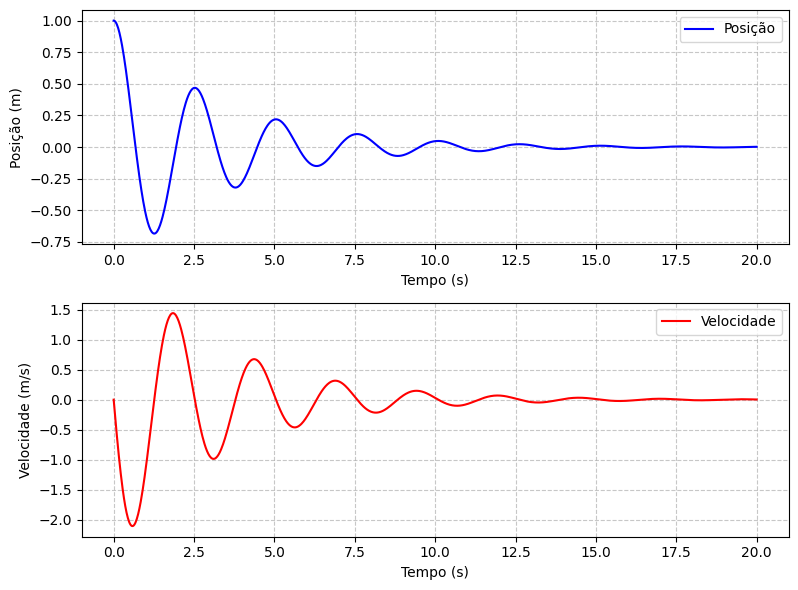

In [76]:
def oscilador(y0, t, w, b):
    """
    Resolve numericamente a equação de movimento de um oscilador harmônico amortecido.

    O sistema é descrito pelas equações diferenciais de primeira ordem:
    dy[0]/dt = y[1]
    dy[1]/dt = -w² * y[0] - b * y[1]

    Parâmetros:
    - y0 (array_like): Condições iniciais [posição, velocidade].
    - tempo (array_like): Vetor de tempos nos quais a solução será avaliada.
    - w (float): Frequência angular natural do oscilador (rad/s).
    - b (float): Coeficiente de amortecimento (s⁻¹).

    Retorna:
    - solve_ivp.Result: Objeto contendo:
        - t (array): Tempos simulados.
        - y (2D array): Soluções [posição, velocidade] ao longo do tempo.
    """
    return solve_ivp(lambda t,y: [y[1], -w*y[0]-b*y[1]], [t[0],t[-1]], y0, t_eval=t)


# Condições iniciais e parâmetros
y0 = np.array([1, 0])  # posição inicial = 1, velocidade inicial = 0
t = np.linspace(0, 20, 1000)

# Chamada da função
Y = oscilador(y0, t, 2*np.pi, 0.6)

# Plotagem dos resultados
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(Y.t, Y.y[0], label='Posição', color='blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
plt.plot(Y.t, Y.y[1], label='Velocidade', color='red')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# [3]

## Vibrações na corda